<a href="https://colab.research.google.com/github/Kwangbin/statistic/blob/main/%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#사이킷런 설치
!pip install sklearn

In [4]:
import numpy as np
import pandas as pd

from sklearn.datasets import  load_boston
boston = load_boston()

In [5]:
#데이터 구성 확인
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [6]:
#데이터셋 설명
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [8]:
#데이터셋 데이터프레임으로 변환
# 독립변수 X가 되는 피쳐들을 DF자료형으로 변환
# X = feature_names
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# 배열 추가 target을  PRICE 열에 추가
boston_df['PRICE']=boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
# 데티터셋 크기 확인
boston_df.shape

(506, 14)

In [12]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [13]:
#sklearn 을 사용하여 머신러니 회귀분석을 하기위한 LinearRegression과 데이터셋 분리 작업을 위한 train_test_split , 평가 지표들 import

from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
# X, Y 분할 하기
# Y 종속변수 PRICE
# X 나머지 피쳐(열) 독립변수

Y = boston_df['PRICE']
# PRICE를 제외한 모든열은 X에 
X= boston_df.drop(['PRICE'],axis=1, inplace=False)

In [15]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [16]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [17]:
# 머신 러닝을 위해  모든 데이터중 7:3의 비율로 분할
# 훈련용 데이터와 평가 데이터

X_train,X_test, Y_train,Y_test =train_test_split(X,Y, test_size =0.3, random_state=156)

In [18]:
#선형 회귀분석: 모델 생성
lr = LinearRegression()

In [19]:
#선형 회귀분석: 모델 훈련
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
#선형회귀분석: 평가데이터에 대한 예측 수행 -> 예측결과 Y_predict  구하기
Y_predict = lr.predict(X_test)

In [21]:
Y_predict

array([23.15424087, 19.65590246, 36.42005168, 19.96705124, 32.40150641,
       17.66341192, 30.32844101, 17.8513932 , 10.86187069, 12.83177966,
       21.18350434, 16.41212257, 28.66817527, 37.01110952, 23.42172197,
       24.56906089, 14.55434775, 11.51023436, 30.27784089, 23.48027467,
       22.86210577, 17.61623753, 21.2528808 , 17.29802868, 34.06118291,
        7.19879841, 13.39928425, 19.4234468 , 13.2423286 ,  8.3336837 ,
       29.34933073, 11.83768837, 19.84125562, 23.97623235, 16.34351261,
       13.20973749, 14.3352014 , 17.26323753, 17.37091562, 23.84644351,
       32.8390912 ,  9.3866759 , 19.06694335, -3.98840206, 19.87721947,
       21.26003361, 24.17775745, 35.35923599, 20.32415303, 28.23212889,
       32.67560962, 40.83910565, 41.19126206, 19.78588457, 25.0134137 ,
       24.13111046, 19.62715719, 33.49344219, 23.61402811, 15.31513017,
       22.70657074, 25.78436589, 23.99723589,  8.78013424, 21.81929237,
       39.68193998, 32.8907251 , 30.20417723, 14.35610647, 23.56

In [22]:
# 선형회귀((LinearRegression) 모델을 이용해 분석 모델 구축
mse =mean_squared_error(Y_test,Y_predict)
rmse =np.sqrt(mse)


In [24]:
#회귀 분석은 지도 학습이므로 평가 데이터 X에 대한 결과값 YY_test를 이미 알고 있는 상태에서 평가 데이터 YY_test와 
# 예측 결과Y_predict의 오차를 계산하여 모델을 평가.
# 평가 지표 MSE를 구하고 mean_squared_error( ) 
# 구한 값의 제곱근을 계산하여np.sqrt(mse) 평가 지표 RMSE를 구함 그리고 평가 지표 R2 을 구함r2_score( )

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 17.297, RMSE : 4.159
R^2(Variance score) : 0.757


In [25]:
#선형 회귀의 Y절편 lr.intercept_과 각 피처의 회귀 계수 lr.coef_를 확인
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

Y 절편 값:  40.995595172164755
회귀 계수 값:  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [26]:
# 선형 회귀 분석 모델을 평가 지표를 통해 평가하고 회귀 계수를 확인하여 피처의 영향을 분석
# 회귀 모델에서 구한 회귀 계수 값lr.coef_과 피처 이름X.columns을 묶어서 Series 자료 형으로 만들고, 
# 회귀 계수 값을  기준으로 내림차순으로 정렬하여 ascending=False 확인sort_ values( )

coef = pd.Series(data = np.round(lr.coef_, 2), index = X.columns)
coef.sort_values(ascending = False)


# 회귀 모델 결과를 토대로 보스톤 주택 가격에 대한 회귀식
# YPRICE = -0.11XCRIM + 0.07XZN + 0.03XINDUS + 3.05XCHAS – 19.80XNOX + 3.35XRM + 0.01XAGE - 1.74XDIS + 0.36XRAD - 0.01XTAX - 0.92XPTRATIO + 0.01XB - 0.57XLSTAT + 41.00


RM          3.35
CHAS        3.05
RAD         0.36
ZN          0.07
INDUS       0.03
B           0.01
AGE         0.01
TAX        -0.01
CRIM       -0.11
LSTAT      -0.57
PTRATIO    -0.92
DIS        -1.74
NOX       -19.80
dtype: float64

In [27]:
#시각화
import matplotlib.pyplot as plt
import seaborn as sns

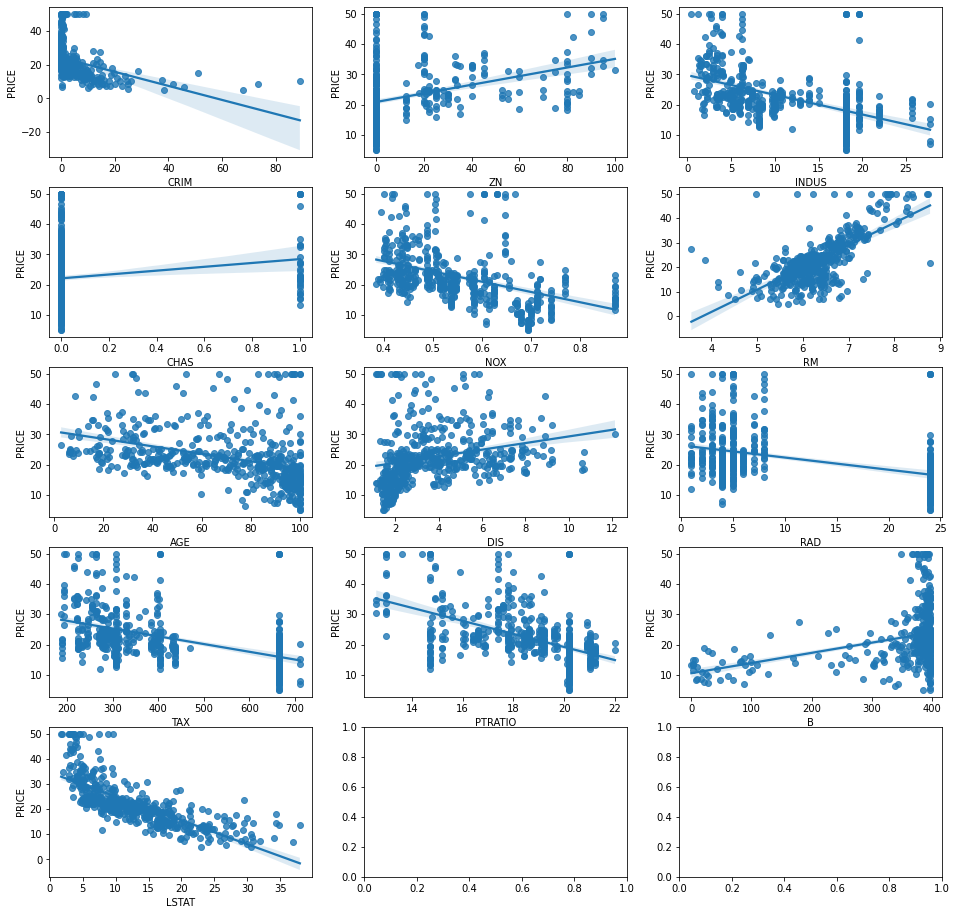

In [35]:
# 독립 변수인 13개 피처와 종속 변수인 주택 가격, PRICE와의 회귀 관계를 보여주는 
# 13개 그래프를 subplots()를 사용하여 5행 3열 구조로 모아서 나타냄
# aborn의 regplot()은 산점도 그래프와 선형 회귀 그래프를 함께 그려줌

fig, axs = plt.subplots(figsize = (16, 16), ncols = 3, nrows = 5)
x_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = feature, y = 'PRICE', data = boston_df, ax = axs[row][col])
